## Credit Card Fraud Detection

In this project you will predict fraudulent credit card transactions with the help of Machine learning models. Please import the following libraries to get started.

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
# Import libraries

import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn import metrics
from sklearn import preprocessing
from sklearn import model_selection

## Exploratory data analysis

In [6]:
# Read data from csv

df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/creditcard.csv') #/content/drive/MyDrive/Colab Notebooks/
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [7]:
#observe the different feature type present in the data

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

Here we will observe the distribution of our classes

In [8]:
# analysing Class variable

classes=df['Class'].value_counts()
normal_share=classes[0]/df['Class'].count()*100
fraud_share=classes[1]/df['Class'].count()*100

<BarContainer object of 2 artists>

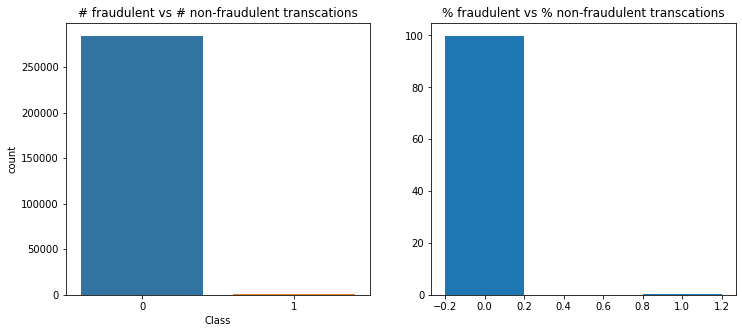

In [9]:
# Create a bar plot for the number and percentage of fraudulent vs non-fraudulent transcations

plt.figure(figsize=(12,5))
plt.subplot(121)
plt.title('# fraudulent vs # non-fraudulent transcations')
sns.countplot(df['Class'])

plt.subplot(122)
plt.title('% fraudulent vs % non-fraudulent transcations')
plt.bar([0, 1], [normal_share, fraud_share], width = 0.4)

From above plots, we can see that there are negligible amount of fraudulent transactions which is our focus class. This indicates the dataset is a very highly imbalanced dataset. 

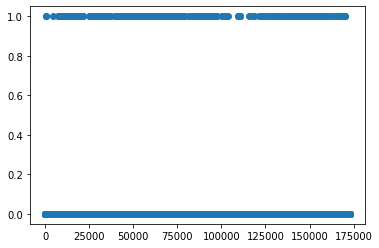

In [10]:
# Create a scatter plot to observe the distribution of classes with time

plt.scatter(df['Time'], df['Class'])

From above plot, the distribution of Time across both the classes is same and we can also say that there are no outliers.

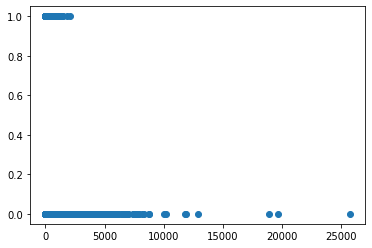

In [11]:
# Create a scatter plot to observe the distribution of classes with Amount

plt.scatter(df['Amount'], df['Class'])

From above plot, the distribution of Amount across both the classes is quite opposite to each other. It is quite clear that there are outliers in Amount for Non fraudulent trasactions but they are expected as the customers are expected to perform some high value transactions. Distribution of Amount from Fraudulent transactions is from 0 to 5000 which are not extremely high value transactions but are significantly high which should be taken care of. 

Dropping the Time variable as it does not add much information

In [12]:
# Drop unnecessary columns

df.drop(columns='Time', inplace=True)
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


### Splitting the data into train & test data

In [13]:
# pop Class to create y
y= df.pop('Class') #class variable

In [14]:
# Splitting data into train and test sets
from sklearn import model_selection

X_train, X_test, y_train, y_test = model_selection.train_test_split(df, y, train_size=.8, random_state=42, stratify=y)

##### Preserve X_test & y_test to evaluate on the test data once you build the model

In [15]:
# Checking fraudulent trasactions in train and test sets
print(np.sum(y))
print(np.sum(y_train))
print(np.sum(y_test))

492
394
98


### Plotting the distribution of a variable

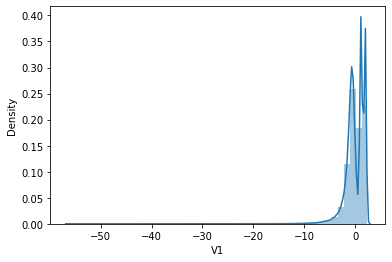

In [16]:
# plot the histogram of a variable from the dataset to see the skewness

sns.distplot(X_train['V1'])

From the above plot we can see the there is skewness in the distribution.

### If there is skewness present in the distribution use:
- <b>Power Transformer</b> package present in the <b>preprocessing library provided by sklearn</b> to make distribution more gaussian

In [17]:
# - Apply : preprocessing.PowerTransformer(copy=False) to fit & transform the train & test data

pt = preprocessing.PowerTransformer(copy=False)

X_train_pt = pt.fit_transform(X_train)
X_test_pt = pt.transform(X_test)

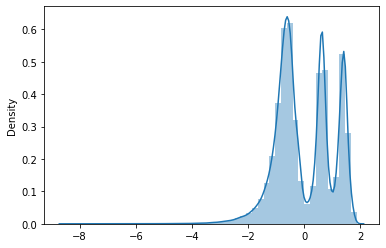

In [18]:
# plot the histogram of a variable from the dataset again to see the result 

sns.distplot(X_train_pt[:, 0])

After applying Power Transformation, skewnness has been reduced to some extent.

## Model Building
- Build different models on the imbalanced dataset and see the result

In [16]:
# Logistic Regression

from sklearn import linear_model #import the package

num_C = [0, 0.05, 0.1, 0.15]  #--> list of values
cv_num = [3, 4, 5]  #--> list of values

#### perfom cross validation on the X_train & y_train to create:
- X_train_cv
- X_test_cv 
- y_train_cv
- y_test_cv 

In [17]:
#perform cross validation

#perform hyperparameter tuning

best_scr_ub = []
best_est_ub = []

best_est_lr_ub = []
best_score_lr_ub = []

for k_lr_ub in cv_num:
    sk_lr_ub = model_selection.StratifiedKFold(n_splits=k_lr_ub)
    for train_ind, test_ind in sk_lr_ub.split(X_train, y_train):
        X_train_cv, X_test_cv = X_train_pt[train_ind], X_train_pt[test_ind] 
        y_train_cv, y_test_cv = np.array(y_train)[train_ind], np.array(y_train)[test_ind]
    log_re_ub = linear_model.LogisticRegression(n_jobs=-1, random_state=42, verbose=1)
    params_lr_ub = {'penalty' : ['l1', 'l2'], 
              'C' : num_C}
    gs_Log_ub = model_selection.GridSearchCV(log_re_ub, 
                                             param_grid=params_lr_ub, 
                                             scoring='roc_auc', 
                                             n_jobs=-1, 
                                             cv=sk_lr_ub, 
                                             verbose=1)
    gs_Log_ub.fit(X_train_cv, y_train_cv)
    print(gs_Log_ub.best_score_)
    print(gs_Log_ub.best_estimator_)
    best_score_lr_ub.append(gs_Log_ub.best_score_)
    best_est_lr_ub.append(gs_Log_ub.best_estimator_)
    
lr_best_ub = best_est_lr_ub[best_score_lr_ub.index(max(best_score_lr_ub))] # Getting the best estimator
lr_best_ub.fit(X_train_cv, y_train_cv) # fit using best estimator

#print the evaluation result by choosing a evaluation metric

print("AUC score on train data is {}".format(metrics.roc_auc_score(y_train_cv, lr_best_ub.predict(X_train_cv))))
print("AUC score on test data is {}".format(metrics.roc_auc_score(y_test_cv, lr_best_ub.predict(X_test_cv))))
best_scr_ub.append(metrics.roc_auc_score(y_test_cv, lr_best_ub.predict(X_test_cv)))
best_est_ub.append(lr_best_ub)


#print the optimum value of hyperparameters

print('Best C value is {}'.format(lr_best_ub.get_params()['C']))

Fitting 3 folds for each of 8 candidates, totalling 24 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 out of  24 | elapsed:    5.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    1.9s finished


0.9761427704118701
LogisticRegression(C=0.05, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=42,
                   solver='lbfgs', tol=0.0001, verbose=1, warm_start=False)
Fitting 4 folds for each of 8 candidates, totalling 32 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  32 out of  32 | elapsed:    6.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    2.0s finished


0.9800890753724286
LogisticRegression(C=0.05, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=42,
                   solver='lbfgs', tol=0.0001, verbose=1, warm_start=False)
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    9.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    2.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


0.9800701793614144
LogisticRegression(C=0.05, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=42,
                   solver='lbfgs', tol=0.0001, verbose=1, warm_start=False)
AUC score on train data is 0.8269264223111475
AUC score on test data is 0.822707870139772
Best C value is 0.05


[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    2.3s finished


### Similarly explore other algorithms by building models like:
- KNN
- SVM
- Decision Tree
- Random Forest
- XGBoost

In [18]:
# Model building using RandomForest

from sklearn.ensemble import RandomForestClassifier

best_est_rf_ub = []
best_score_rf_ub = []

for k_rf_ub in cv_num:
    sk_rf_ub = model_selection.StratifiedKFold(n_splits=k_rf_ub)
    for train_ind, test_ind in sk_rf_ub.split(X_train, y_train):
        X_train_cv, X_test_cv = X_train_pt[train_ind], X_train_pt[test_ind] 
        y_train_cv, y_test_cv = np.array(y_train)[train_ind], np.array(y_train)[test_ind]
    rf_ub = RandomForestClassifier(n_jobs=-1, random_state=42, verbose=1)
    params_rf_ub = {'n_estimators' : [5, 10, 15, 20],
          'max_depth' : [7, 10, 12, 15],
          'min_samples_leaf' : [5, 10, 15]
          }
    gs_rf_ub = model_selection.GridSearchCV(rf_ub, 
                                            param_grid=params_rf_ub, 
                                            scoring='roc_auc', 
                                            n_jobs=-1, 
                                            cv=sk_rf_ub, 
                                            verbose=1)
    gs_rf_ub.fit(X_train_cv, y_train_cv)
    print(gs_rf_ub.best_score_)
    print(gs_rf_ub.best_estimator_)
    best_score_rf_ub.append(gs_rf_ub.best_score_)
    best_est_rf_ub.append(gs_rf_ub.best_estimator_)

rf_best_ub = best_est_rf_ub[best_score_rf_ub.index(max(best_score_rf_ub))] # Getting the best estimator
rf_best_ub.fit(X_train_cv, y_train_cv) # fit using best estimator

#print the evaluation result by choosing a evaluation metric

print("AUC score on train data is {}".format(metrics.roc_auc_score(y_train_cv, rf_best_ub.predict(X_train_cv))))
print("AUC score on test data is {}".format(metrics.roc_auc_score(y_test_cv, rf_best_ub.predict(X_test_cv))))
best_scr_ub.append(metrics.roc_auc_score(y_test_cv, rf_best_ub.predict(X_test_cv)))
best_est_ub.append(rf_best_ub)

#print the optimum value of hyperparameters

print('Best n_estimators value is {}'.format(rf_best_ub.get_params()['n_estimators']))
print('Best max_depth value is {}'.format(rf_best_ub.get_params()['max_depth']))
print('Best min_samples_leaf value is {}'.format(rf_best_ub.get_params()['min_samples_leaf']))

Fitting 3 folds for each of 48 candidates, totalling 144 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  3.4min
[Parallel(n_jobs=-1)]: Done 144 out of 144 | elapsed: 14.1min finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:   14.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


0.9713836678299591
RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=10, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=20, n_jobs=-1,
                       oob_score=False, random_state=42, verbose=1,
                       warm_start=False)
Fitting 4 folds for each of 48 candidates, totalling 192 fits


[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  3.9min
[Parallel(n_jobs=-1)]: Done 192 out of 192 | elapsed: 24.7min finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:   21.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


0.9709855542522543
RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=15, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=15, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=20, n_jobs=-1,
                       oob_score=False, random_state=42, verbose=1,
                       warm_start=False)
Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  4.4min
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed: 27.6min
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed: 36.5min finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:   15.8s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.


0.9773225487099051
RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=12, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=15, n_jobs=-1,
                       oob_score=False, random_state=42, verbose=1,
                       warm_start=False)


[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:   15.9s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  15 out of  15 | elapsed:    0.2s finished


AUC score on train data is 0.8856565810413063
AUC score on test data is 0.8860209922336528


[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  15 out of  15 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  15 out of  15 | elapsed:    0.0s finished


Best n_estimators value is 15
Best max_depth value is 12
Best min_samples_leaf value is 10


In [19]:
# Model building using Decision tree

from sklearn.tree import DecisionTreeClassifier

best_est_dt_ub = []
best_score_dt_ub = []

for k_dt_ub in cv_num:
    sk_dt_ub = model_selection.StratifiedKFold(n_splits=k_dt_ub)
    for train_ind, test_ind in sk_dt_ub.split(X_train, y_train):
        X_train_cv, X_test_cv = X_train_pt[train_ind], X_train_pt[test_ind] 
        y_train_cv, y_test_cv = np.array(y_train)[train_ind], np.array(y_train)[test_ind]
    dt_ub = DecisionTreeClassifier()
    params_dt_ub = {'max_depth' : [10, 12, 15, 17],
          'min_samples_leaf' : [15, 20, 22, 25],
          'max_leaf_nodes' : [10, 15, 20, 25]
          }
    gs_dt_ub = model_selection.GridSearchCV(dt_ub, 
                                            param_grid=params_dt_ub, 
                                            scoring='roc_auc', 
                                            n_jobs=-1, 
                                            cv=sk_dt_ub, 
                                            verbose=1)
    gs_dt_ub.fit(X_train_cv, y_train_cv)
    print(gs_dt_ub.best_score_)
    print(gs_dt_ub.best_estimator_)
    best_score_dt_ub.append(gs_dt_ub.best_score_)
    best_est_dt_ub.append(gs_dt_ub.best_estimator_)
    
dt_best_ub = best_est_dt_ub[best_score_dt_ub.index(max(best_score_dt_ub))] # Getting the best estimator
dt_best_ub.fit(X_train_cv, y_train_cv) # fit using best estimator

#print the evaluation result by choosing a evaluation metric

print("AUC score on train data is {}".format(metrics.roc_auc_score(y_train_cv, dt_best_ub.predict(X_train_cv))))
print("AUC score on test data is {}".format(metrics.roc_auc_score(y_test_cv, dt_best_ub.predict(X_test_cv))))
best_scr_ub.append(metrics.roc_auc_score(y_test_cv, dt_best_ub.predict(X_test_cv)))
best_est_ub.append(dt_best_ub)

#print the optimum value of hyperparameters

print('Best max_depth value is {}'.format(dt_best_ub.get_params()['max_depth']))
print('Best min_samples_leaf value is {}'.format(dt_best_ub.get_params()['min_samples_leaf']))
print('Best max_leaf_nodes value is {}'.format(dt_best_ub.get_params()['max_leaf_nodes']))

Fitting 3 folds for each of 64 candidates, totalling 192 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 192 out of 192 | elapsed:  8.9min finished


0.9383582397956696
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=12, max_features=None, max_leaf_nodes=15,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=20, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')
Fitting 4 folds for each of 64 candidates, totalling 256 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed: 10.5min
[Parallel(n_jobs=-1)]: Done 256 out of 256 | elapsed: 13.7min finished


0.9427853965087394
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=15, max_features=None, max_leaf_nodes=15,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=22, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')
Fitting 5 folds for each of 64 candidates, totalling 320 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed: 12.0min
[Parallel(n_jobs=-1)]: Done 320 out of 320 | elapsed: 20.2min finished


0.9387663518527705
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=12, max_features=None, max_leaf_nodes=20,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=20, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')
AUC score on train data is 0.8951556599909818
AUC score on test data is 0.8670006761814392
Best max_depth value is 15
Best min_samples_leaf value is 22
Best max_leaf_nodes value is 15


#### Proceed with the model which shows the best result 
- Apply the best hyperparameter on the model
- Predict on the test dataset

In [21]:
clf = best_est_ub[best_scr_ub.index(max(best_scr_ub))]  #initialise the model with optimum hyperparameters
clf.fit(X_train, y_train) # fit the train data with optimum hyperparameters
print("AUC score on X_test data is {}".format(metrics.roc_auc_score(y_test, clf.predict(X_test))))

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:   19.5s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  15 out of  15 | elapsed:    0.1s finished


AUC score on X_test data is 0.8774542984047867


### Print the important features of the best model to understand the dataset
- This will not give much explanation on the already transformed dataset
- But it will help us in understanding if the dataset is not PCA transformed

Top var = 14
2nd Top var = 17
3rd Top var = 12


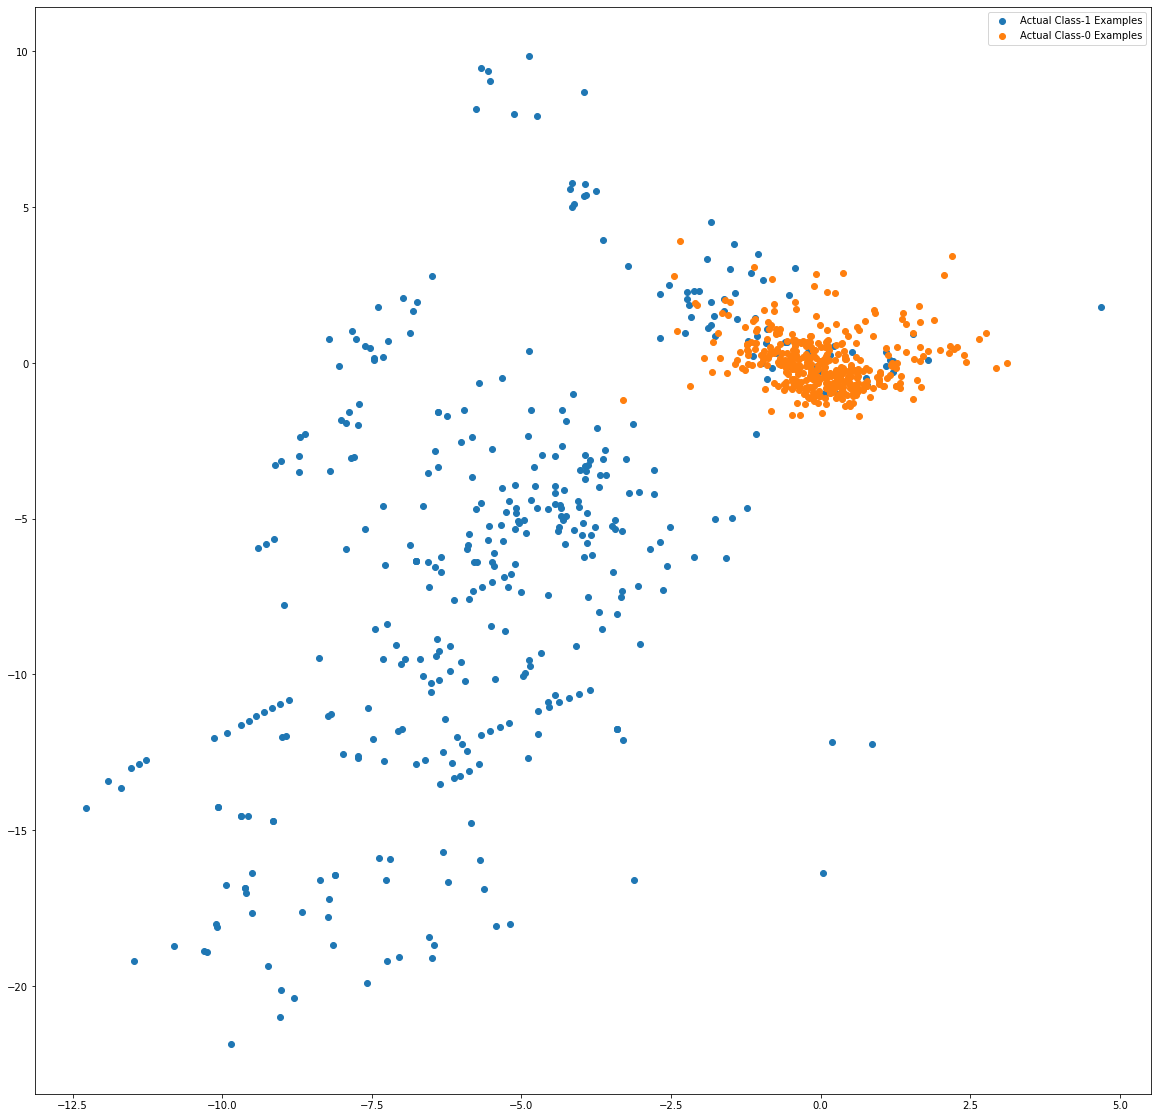

In [22]:
var_imp = []
for i in clf.feature_importances_:
    var_imp.append(i)
print('Top var =', var_imp.index(np.sort(clf.feature_importances_)[-1])+1)
print('2nd Top var =', var_imp.index(np.sort(clf.feature_importances_)[-2])+1)
print('3rd Top var =', var_imp.index(np.sort(clf.feature_importances_)[-3])+1)

# Variable on Index-16 and Index-13 seems to be the top 2 variables
top_var_index = var_imp.index(np.sort(clf.feature_importances_)[-1])
second_top_var_index = var_imp.index(np.sort(clf.feature_importances_)[-2])

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]

np.random.shuffle(X_train_0)

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]

plt.scatter(X_train_1[:, top_var_index], X_train_1[:, second_top_var_index], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], top_var_index], X_train_0[:X_train_1.shape[0], second_top_var_index],
            label='Actual Class-0 Examples')
plt.legend()

## Model building with balancing Classes

##### Perform class balancing with :
- Random Oversampling
- SMOTE
- ADASYN

## Model Building
- Build different models on the balanced dataset and see the result

In [19]:
# Logistic Regression

from sklearn import linear_model #import the package

num_C = [4, 6, 8, 10, 12]  #--> list of values
cv_num = [3, 4, 5]  #--> list of values

#### perfom cross validation on the X_train & y_train to create:
- X_train_cv
- X_test_cv 
- y_train_cv
- y_test_cv 

### Random Oversampling

In [20]:
from imblearn import over_sampling #- import the packages

#perform cross validation & then balance classes on X_train_cv & y_train_cv using Random Oversampling

#perform hyperparameter tuning

best_scr_bal = []
best_est_bal = {}

best_est_lr_ro = []
best_score_lr_ro = []
for k_lr_ro in cv_num:
    sk_lr_ro = model_selection.StratifiedKFold(n_splits=k_lr_ro)
    for train_ind, test_ind in sk_lr_ro.split(X_train, y_train):
        X_train_cv, X_test_cv = X_train_pt[train_ind], X_train_pt[test_ind] 
        y_train_cv, y_test_cv = np.array(y_train)[train_ind], np.array(y_train)[test_ind]
    ros =  over_sampling.RandomOverSampler()
    X_train_cv, y_train_cv = ros.fit_resample(X_train_cv, y_train_cv)
    log_re_ro = linear_model.LogisticRegression(n_jobs=-1, random_state=42, verbose=1)
    params_lr_ro = {'penalty' : ['l1', 'l2'], 
              'C' : num_C}
    gs_Log_ro = model_selection.GridSearchCV(log_re_ro, 
                                             param_grid=params_lr_ro, 
                                             scoring='roc_auc', 
                                             n_jobs=-1, 
                                             cv=sk_lr_ro, 
                                             verbose=1)
    gs_Log_ro.fit(X_train_cv, y_train_cv)
    print(gs_Log_ro.best_score_)
    print(gs_Log_ro.best_estimator_)
    best_score_lr_ro.append(gs_Log_ro.best_score_)
    best_est_lr_ro.append(gs_Log_ro.best_estimator_)
    
lr_best_ro = best_est_lr_ro[best_score_lr_ro.index(max(best_score_lr_ro))] # Getting the best estimator
lr_best_ro.fit(X_train_cv, y_train_cv) # fit using best estimator

#print the evaluation result by choosing a evaluation metric

print("AUC score on train data is {}".format(metrics.roc_auc_score(y_train_cv, lr_best_ro.predict(X_train_cv))))
print("AUC score on test data is {}".format(metrics.roc_auc_score(y_test_cv, lr_best_ro.predict(X_test_cv))))
best_scr_bal.append(metrics.roc_auc_score(y_test_cv, lr_best_ro.predict(X_test_cv)))
best_est_bal['lr_best_ro'] = lr_best_ro

#print the optimum value of hyperparameters

print('Best C value is {}'.format(lr_best_ro.get_params()['C']))

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   15.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    5.4s finished


0.9854275877587387
LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=42,
                   solver='lbfgs', tol=0.0001, verbose=1, warm_start=False)
Fitting 4 folds for each of 10 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:   24.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    6.3s finished


0.9870128878553597
LogisticRegression(C=12, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=42,
                   solver='lbfgs', tol=0.0001, verbose=1, warm_start=False)
Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   34.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    7.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


0.9869991914684653
LogisticRegression(C=12, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=42,
                   solver='lbfgs', tol=0.0001, verbose=1, warm_start=False)


[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    7.1s finished


AUC score on train data is 0.9504783992174148
AUC score on test data is 0.9487696558709523
Best C value is 12


### Similarly explore other algorithms on balanced dataset by building models like:
- KNN
- SVM
- Decision Tree
- Random Forest
- XGBoost

In [21]:
# Model building using RandomForest

from sklearn.ensemble import RandomForestClassifier

best_est_rf_ro = []
best_score_rf_ro = []

for k_rf_ro in cv_num:
    sk_rf_ro = model_selection.StratifiedKFold(n_splits=k_rf_ro)
    for train_ind, test_ind in sk_rf_ro.split(X_train, y_train):
        X_train_cv, X_test_cv = X_train_pt[train_ind], X_train_pt[test_ind] 
        y_train_cv, y_test_cv = np.array(y_train)[train_ind], np.array(y_train)[test_ind]
    ros =  over_sampling.RandomOverSampler()
    X_train_cv, y_train_cv = ros.fit_resample(X_train_cv, y_train_cv)
    rf_ro = RandomForestClassifier(n_jobs=-1, random_state=42, verbose=1)
    params_rf_ro = {'n_estimators' : [15, 20, 25, 30],
          'max_depth' : [3, 7, 9],
          'max_leaf_nodes' : [10, 15, 20]
          }
    gs_rf_ro = model_selection.GridSearchCV(rf_ro, 
                                            param_grid=params_rf_ro, 
                                            scoring='roc_auc', 
                                            n_jobs=-1, 
                                            cv=sk_rf_ro, 
                                            verbose=1)
    gs_rf_ro.fit(X_train_cv, y_train_cv)
    print(gs_rf_ro.best_score_)
    print(gs_rf_ro.best_estimator_)
    best_score_rf_ro.append(gs_rf_ro.best_score_)
    best_est_rf_ro.append(gs_rf_ro.best_estimator_)

rf_best_ro = best_est_rf_ro[best_score_rf_ro.index(max(best_score_rf_ro))] # Getting the best estimator
rf_best_ro.fit(X_train_cv, y_train_cv) # fit using best estimator

#print the evaluation result by choosing a evaluation metric

print("AUC score on train data is {}".format(metrics.roc_auc_score(y_train_cv, rf_best_ro.predict(X_train_cv))))
print("AUC score on test data is {}".format(metrics.roc_auc_score(y_test_cv, rf_best_ro.predict(X_test_cv))))
best_scr_bal.append(metrics.roc_auc_score(y_test_cv, rf_best_ro.predict(X_test_cv)))
best_est_bal['rf_best_ro'] = rf_best_ro

#print the optimum value of hyperparameters

print('Best n_estimators value is {}'.format(rf_best_ro.get_params()['n_estimators']))
print('Best max_depth value is {}'.format(rf_best_ro.get_params()['max_depth']))
print('Best max_leaf_nodes value is {}'.format(rf_best_ro.get_params()['max_leaf_nodes']))

Fitting 3 folds for each of 36 candidates, totalling 108 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  4.1min
[Parallel(n_jobs=-1)]: Done 108 out of 108 | elapsed: 12.3min finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   17.7s finished


0.9972124204105186
RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=9, max_features='auto',
                       max_leaf_nodes=20, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=30, n_jobs=-1,
                       oob_score=False, random_state=42, verbose=1,
                       warm_start=False)
Fitting 4 folds for each of 36 candidates, totalling 144 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  4.6min
[Parallel(n_jobs=-1)]: Done 144 out of 144 | elapsed: 21.0min finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   20.4s finished


0.9973026095627888
RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=9, max_features='auto',
                       max_leaf_nodes=20, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=30, n_jobs=-1,
                       oob_score=False, random_state=42, verbose=1,
                       warm_start=False)
Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  5.3min
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed: 30.6min finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   21.6s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.


0.9972548358706639
RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=9, max_features='auto',
                       max_leaf_nodes=20, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=30, n_jobs=-1,
                       oob_score=False, random_state=42, verbose=1,
                       warm_start=False)


[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   21.6s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  30 out of  30 | elapsed:    0.4s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.


AUC score on train data is 0.9697462643093848
AUC score on test data is 0.9334553984600872
Best n_estimators value is 30
Best max_depth value is 9
Best max_leaf_nodes value is 20


[Parallel(n_jobs=2)]: Done  30 out of  30 | elapsed:    0.1s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  30 out of  30 | elapsed:    0.1s finished


In [22]:
# Model building using Decision tree

from sklearn.tree import DecisionTreeClassifier

best_est_dt_ro = []
best_score_dt_ro = []

for k_dt_ro in cv_num:
    sk_dt_ro = model_selection.StratifiedKFold(n_splits=k_dt_ro)
    for train_ind, test_ind in sk_dt_ro.split(X_train, y_train):
        X_train_cv, X_test_cv = X_train_pt[train_ind], X_train_pt[test_ind] 
        y_train_cv, y_test_cv = np.array(y_train)[train_ind], np.array(y_train)[test_ind]
    ros =  over_sampling.RandomOverSampler()
    X_train_cv, y_train_cv = ros.fit_resample(X_train_cv, y_train_cv)
    dt_ro = DecisionTreeClassifier()
    params_dt_ro = {'max_depth' : [15, 17, 21, 25],
          'min_samples_leaf' : [15, 20, 22, 25],
          'max_leaf_nodes' : [10, 15, 20, 25]
          }
    gs_dt_ro = model_selection.GridSearchCV(dt_ro, 
                                            param_grid=params_dt_ro, 
                                            scoring='roc_auc', 
                                            n_jobs=-1, 
                                            cv=sk_dt_ro, 
                                            verbose=1)
    gs_dt_ro.fit(X_train_cv, y_train_cv)
    print(gs_dt_ro.best_score_)
    print(gs_dt_ro.best_estimator_)
    best_score_dt_ro.append(gs_dt_ro.best_score_)
    best_est_dt_ro.append(gs_dt_ro.best_estimator_)
    
dt_best_ro = best_est_dt_ro[best_score_dt_ro.index(max(best_score_dt_ro))] # Getting the best estimator
dt_best_ro.fit(X_train_cv, y_train_cv) # fit using best estimator

#print the evaluation result by choosing a evaluation metric

print("AUC score on train data is {}".format(metrics.roc_auc_score(y_train_cv, dt_best_ro.predict(X_train_cv))))
print("AUC score on test data is {}".format(metrics.roc_auc_score(y_test_cv, dt_best_ro.predict(X_test_cv))))
best_scr_bal.append(metrics.roc_auc_score(y_test_cv, dt_best_ro.predict(X_test_cv)))
best_est_bal['dt_best_ro'] = dt_best_ro

#print the optimum value of hyperparameters

print('Best max_depth value is {}'.format(dt_best_ro.get_params()['max_depth']))
print('Best min_samples_leaf value is {}'.format(dt_best_ro.get_params()['min_samples_leaf']))
print('Best max_leaf_nodes value is {}'.format(dt_best_ro.get_params()['max_leaf_nodes']))

Fitting 3 folds for each of 64 candidates, totalling 192 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 192 out of 192 | elapsed:  9.0min finished


0.9932712668778017
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=15, max_features=None, max_leaf_nodes=25,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=25, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')
Fitting 4 folds for each of 64 candidates, totalling 256 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed: 10.6min
[Parallel(n_jobs=-1)]: Done 256 out of 256 | elapsed: 13.9min finished


0.9925729836236484
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=15, max_features=None, max_leaf_nodes=25,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=15, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')
Fitting 5 folds for each of 64 candidates, totalling 320 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed: 12.6min
[Parallel(n_jobs=-1)]: Done 320 out of 320 | elapsed: 20.7min finished


0.9920761579129133
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=15, max_features=None, max_leaf_nodes=25,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=15, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')
AUC score on train data is 0.9828397293925621
AUC score on test data is 0.9274320966355103
Best max_depth value is 15
Best min_samples_leaf value is 25
Best max_leaf_nodes value is 25


### Print the class distribution after applying SMOTE 

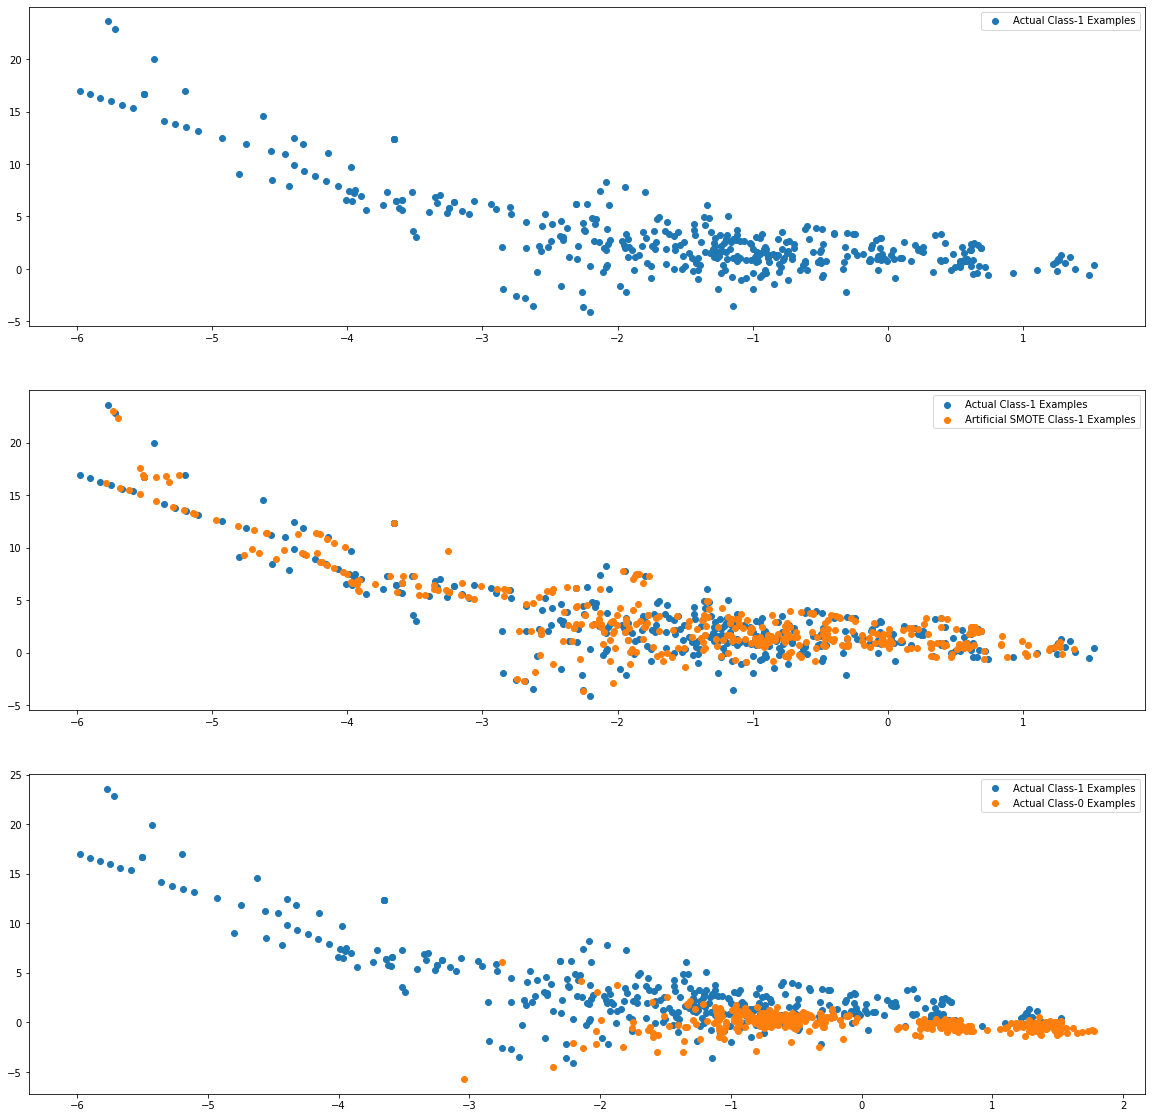

In [23]:
import warnings
warnings.filterwarnings("ignore")


sm = over_sampling.SMOTE(random_state=0)
X_train_smote, y_train_smote = sm.fit_resample(X_train, y_train)
# Artificial minority samples and corresponding minority labels from SMOTE are appended
# below X_train and y_train respectively
# So to exclusively get the artificial minority samples from SMOTE, we do
X_train_smote_1 = X_train_smote[X_train.shape[0]:]

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]


plt.rcParams['figure.figsize'] = [20, 20]
fig = plt.figure()

plt.subplot(3, 1, 1)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 2)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_smote_1[:X_train_1.shape[0], 0], X_train_smote_1[:X_train_1.shape[0], 1],
            label='Artificial SMOTE Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 3)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], 0], X_train_0[:X_train_1.shape[0], 1], label='Actual Class-0 Examples')
plt.legend()

In [24]:
#perform cross validation & then balance classes on X_train_cv & y_train_cv using SMOTE

#perform hyperparameter tuning

num_C = [10, 12, 14, 16]

best_est_lr_sm = []
best_score_lr_sm = []
for k_lr_sm in cv_num:
    sk_lr_sm = model_selection.StratifiedKFold(n_splits=k_lr_sm)
    for train_ind, test_ind in sk_lr_sm.split(X_train, y_train):
        X_train_cv, X_test_cv = X_train_pt[train_ind], X_train_pt[test_ind] 
        y_train_cv, y_test_cv = np.array(y_train)[train_ind], np.array(y_train)[test_ind]
    sm =  over_sampling.SMOTE()
    X_train_cv, y_train_cv = sm.fit_resample(X_train_cv, y_train_cv)
    log_re_sm = linear_model.LogisticRegression(n_jobs=-1, random_state=42, verbose=1)
    params_lr_sm = {'penalty' : ['l1', 'l2'], 
              'C' : num_C}
    gs_Log_sm = model_selection.GridSearchCV(log_re_sm, 
                                             param_grid=params_lr_sm, 
                                             scoring='roc_auc', 
                                             n_jobs=-1, 
                                             cv=sk_lr_sm, 
                                             verbose=1)
    gs_Log_sm.fit(X_train_cv, y_train_cv)
    print(gs_Log_sm.best_score_)
    print(gs_Log_sm.best_estimator_)
    best_score_lr_sm.append(gs_Log_sm.best_score_)
    best_est_lr_sm.append(gs_Log_sm.best_estimator_)
    
lr_best_sm = best_est_lr_sm[best_score_lr_sm.index(max(best_score_lr_sm))] # Getting the best estimator
lr_best_sm.fit(X_train_cv, y_train_cv) # fit using best estimator

#print the evaluation result by choosing a evaluation metric

print("AUC score on train data is {}".format(metrics.roc_auc_score(y_train_cv, lr_best_sm.predict(X_train_cv))))
print("AUC score on test data is {}".format(metrics.roc_auc_score(y_test_cv, lr_best_sm.predict(X_test_cv))))
best_scr_bal.append(metrics.roc_auc_score(y_test_cv, lr_best_sm.predict(X_test_cv)))
best_est_bal['lr_best_sm'] = lr_best_sm

#print the optimum value of hyperparameters

print('Best C value is {}'.format(lr_best_sm.get_params()['C']))

Fitting 3 folds for each of 8 candidates, totalling 24 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 out of  24 | elapsed:   10.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    4.9s finished


0.9886931646305742
LogisticRegression(C=16, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=42,
                   solver='lbfgs', tol=0.0001, verbose=1, warm_start=False)
Fitting 4 folds for each of 8 candidates, totalling 32 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  32 out of  32 | elapsed:   17.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    5.0s finished


0.9897779714622751
LogisticRegression(C=16, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=42,
                   solver='lbfgs', tol=0.0001, verbose=1, warm_start=False)
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:   25.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    5.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


0.9892826302504595
LogisticRegression(C=16, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=42,
                   solver='lbfgs', tol=0.0001, verbose=1, warm_start=False)


[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    5.9s finished


AUC score on train data is 0.9465215073559718
AUC score on test data is 0.947604564642111
Best C value is 16


##### Build models on other algorithms to see the better performing on SMOTE

In [ ]:
# Model building using RandomForest

from sklearn.ensemble import RandomForestClassifier

best_est_rf_sm = []
best_score_rf_sm = []

for k_rf_sm in cv_num:
    sk_rf_sm = model_selection.StratifiedKFold(n_splits=k_rf_sm)
    for train_ind, test_ind in sk_rf_sm.split(X_train, y_train):
        X_train_cv, X_test_cv = X_train_pt[train_ind], X_train_pt[test_ind] 
        y_train_cv, y_test_cv = np.array(y_train)[train_ind], np.array(y_train)[test_ind]
    sm =  over_sampling.SMOTE()
    X_train_cv, y_train_cv = sm.fit_resample(X_train_cv, y_train_cv)
    rf_sm = RandomForestClassifier(n_jobs=-1, random_state=42, verbose=1)
    params_rf_sm = {'n_estimators' : [10, 15, 20],
          'max_depth' : [5, 7, 10],
          'max_leaf_nodes' : [5, 10, 15, 20]
          }
    gs_rf_sm = model_selection.GridSearchCV(rf_sm, 
                                            param_grid=params_rf_sm, 
                                            scoring='roc_auc', 
                                            n_jobs=-1, 
                                            cv=sk_rf_sm, 
                                            verbose=1)
    gs_rf_sm.fit(X_train_cv, y_train_cv)
    print(gs_rf_sm.best_score_)
    print(gs_rf_sm.best_estimator_)
    best_score_rf_sm.append(gs_rf_sm.best_score_)
    best_est_rf_sm.append(gs_rf_sm.best_estimator_)

rf_best_sm = best_est_rf_sm[best_score_rf_sm.index(max(best_score_rf_sm))] # Getting the best estimator
rf_best_sm.fit(X_train_cv, y_train_cv) # fit using best estimator

#print the evaluation result by choosing a evaluation metric

print("AUC score on train data is {}".format(metrics.roc_auc_score(y_train_cv, rf_best_sm.predict(X_train_cv))))
print("AUC score on test data is {}".format(metrics.roc_auc_score(y_test_cv, rf_best_sm.predict(X_test_cv))))
best_scr_bal.append(metrics.roc_auc_score(y_test_cv, rf_best_sm.predict(X_test_cv)))
best_est_bal['rf_best_sm'] = rf_best_sm

#print the optimum value of hyperparameters

print('Best n_estimators value is {}'.format(rf_best_sm.get_params()['n_estimators']))
print('Best max_depth value is {}'.format(rf_best_sm.get_params()['max_depth']))
print('Best max_leaf_nodes value is {}'.format(rf_best_sm.get_params()['max_leaf_nodes']))

Fitting 3 folds for each of 36 candidates, totalling 108 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


In [ ]:
# Model building using Decision tree

from sklearn.tree import DecisionTreeClassifier

best_est_dt_sm = []
best_score_dt_sm = []

for k_dt_sm in cv_num:
    sk_dt_sm = model_selection.StratifiedKFold(n_splits=k_dt_sm)
    for train_ind, test_ind in sk_dt_sm.split(X_train, y_train):
        X_train_cv, X_test_cv = X_train_pt[train_ind], X_train_pt[test_ind] 
        y_train_cv, y_test_cv = np.array(y_train)[train_ind], np.array(y_train)[test_ind]
    sm =  over_sampling.SMOTE()
    X_train_cv, y_train_cv = sm.fit_resample(X_train_cv, y_train_cv)
    dt_sm = DecisionTreeClassifier()
    params_dt_sm = {'max_depth' : [7, 11, 15, 17],
          'min_samples_leaf' : [10, 12, 15, 20],
          'max_leaf_nodes' : [20, 25, 30]
          }
    gs_dt_sm = model_selection.GridSearchCV(dt_sm, 
                                            param_grid=params_dt_sm, 
                                            scoring='roc_auc', 
                                            n_jobs=-1, 
                                            cv=sk_dt_sm, 
                                            verbose=1)
    gs_dt_sm.fit(X_train_cv, y_train_cv)
    print(gs_dt_sm.best_score_)
    print(gs_dt_sm.best_estimator_)
    best_score_dt_sm.append(gs_dt_sm.best_score_)
    best_est_dt_sm.append(gs_dt_sm.best_estimator_)
    
dt_best_sm = best_est_dt_sm[best_score_dt_sm.index(max(best_score_dt_sm))] # Getting the best estimator
dt_best_sm.fit(X_train_cv, y_train_cv) # fit using best estimator

#print the evaluation result by choosing a evaluation metric

print("AUC score on train data is {}".format(metrics.roc_auc_score(y_train_cv, dt_best_sm.predict(X_train_cv))))
print("AUC score on test data is {}".format(metrics.roc_auc_score(y_test_cv, dt_best_sm.predict(X_test_cv))))
best_scr_bal.append(metrics.roc_auc_score(y_test_cv, dt_best_sm.predict(X_test_cv)))
best_est_bal['dt_best_sm'] = dt_best_sm

#print the optimum value of hyperparameters

print('Best max_depth value is {}'.format(dt_best_sm.get_params()['max_depth']))
print('Best min_samples_leaf value is {}'.format(dt_best_sm.get_params()['min_samples_leaf']))
print('Best max_leaf_nodes value is {}'.format(dt_best_sm.get_params()['max_leaf_nodes']))

### Print the class distribution after applying ADASYN

In [ ]:
import warnings
warnings.filterwarnings("ignore")

from imblearn import over_sampling

ada = over_sampling.ADASYN(random_state=0)
X_train_adasyn, y_train_adasyn = ada.fit_resample(X_train, y_train)
# Artificial minority samples and corresponding minority labels from ADASYN are appended
# below X_train and y_train respectively
# So to exclusively get the artificial minority samples from ADASYN, we do
X_train_adasyn_1 = X_train_adasyn[X_train.shape[0]:]

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]



import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]
fig = plt.figure()

plt.subplot(3, 1, 1)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 2)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_adasyn_1[:X_train_1.shape[0], 0], X_train_adasyn_1[:X_train_1.shape[0], 1],
            label='Artificial ADASYN Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 3)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], 0], X_train_0[:X_train_1.shape[0], 1], label='Actual Class-0 Examples')
plt.legend()

In [ ]:
#perform cross validation & then balance classes on X_train_cv & y_train_cv using ADASYN

#perform hyperparameter tuning

num_C = [1, 3, 5, 7]

best_est_lr_ad = []
best_score_lr_ad = []
for k_lr_ad in cv_num:
    sk_lr_ad = model_selection.StratifiedKFold(n_splits=k_lr_ad)
    for train_ind, test_ind in sk_lr_ad.split(X_train, y_train):
        X_train_cv, X_test_cv = X_train_pt[train_ind], X_train_pt[test_ind] 
        y_train_cv, y_test_cv = np.array(y_train)[train_ind], np.array(y_train)[test_ind]
    ad =  over_sampling.ADASYN()
    X_train_cv, y_train_cv = ad.fit_resample(X_train_cv, y_train_cv)
    log_re_ad = linear_model.LogisticRegression(n_jobs=-1, random_state=42, verbose=1)
    params_lr_ad = {'penalty' : ['l1', 'l2'], 
              'C' : num_C}
    gs_Log_ad = model_selection.GridSearchCV(log_re_ad, 
                                             param_grid=params_lr_ad, 
                                             scoring='roc_auc', 
                                             n_jobs=-1, 
                                             cv=sk_lr_ad, 
                                             verbose=1)
    gs_Log_ad.fit(X_train_cv, y_train_cv)
    print(gs_Log_ad.best_score_)
    print(gs_Log_ad.best_estimator_)
    best_score_lr_ad.append(gs_Log_ad.best_score_)
    best_est_lr_ad.append(gs_Log_ad.best_estimator_)
    
lr_best_ad = best_est_lr_ad[best_score_lr_ad.index(max(best_score_lr_ad))] # Getting the best estimator
lr_best_ad.fit(X_train_cv, y_train_cv) # fit using best estimator

#print the evaluation result by choosing a evaluation metric

print("AUC score on train data is {}".format(metrics.roc_auc_score(y_train_cv, lr_best_ad.predict(X_train_cv))))
print("AUC score on test data is {}".format(metrics.roc_auc_score(y_test_cv, lr_best_ad.predict(X_test_cv))))
best_scr_bal.append(metrics.roc_auc_score(y_test_cv, lr_best_ad.predict(X_test_cv)))
best_est_bal['lr_best_ad'] = lr_best_ad

#print the optimum value of hyperparameters

print('Best C value is {}'.format(lr_best_ad.get_params()['C']))


##### Build models on other algorithms to see the better performing on ADASYN

In [ ]:
# Model building using RandomForest

from sklearn.ensemble import RandomForestClassifier

best_est_rf_ad = []
best_score_rf_ad = []

for k_rf_ad in cv_num:
    sk_rf_ad = model_selection.StratifiedKFold(n_splits=k_rf_ad)
    for train_ind, test_ind in sk_rf_ad.split(X_train, y_train):
        X_train_cv, X_test_cv = X_train_pt[train_ind], X_train_pt[test_ind] 
        y_train_cv, y_test_cv = np.array(y_train)[train_ind], np.array(y_train)[test_ind]
    ad =  over_sampling.ADASYN()
    X_train_cv, y_train_cv = ad.fit_resample(X_train_cv, y_train_cv)
    rf_ad = RandomForestClassifier(n_jobs=-1, random_state=42, verbose=1)
    params_rf_ad = {'n_estimators' : [15, 17, 20],
          'max_depth' : [7, 8, 9, 10],
          'max_leaf_nodes' : [15, 20, 25]
          }
    gs_rf_ad = model_selection.GridSearchCV(rf_ad, 
                                            param_grid=params_rf_ad, 
                                            scoring='roc_auc', 
                                            n_jobs=-1, 
                                            cv=sk_rf_ad, 
                                            verbose=1)
    gs_rf_ad.fit(X_train_cv, y_train_cv)
    print(gs_rf_ad.best_score_)
    print(gs_rf_ad.best_estimator_)
    best_score_rf_ad.append(gs_rf_ad.best_score_)
    best_est_rf_ad.append(gs_rf_ad.best_estimator_)

rf_best_ad = best_est_rf_ad[best_score_rf_ad.index(max(best_score_rf_ad))] # Getting the best estimator
rf_best_ad.fit(X_train_cv, y_train_cv) # fit using best estimator

#print the evaluation result by choosing a evaluation metric

print("AUC score on train data is {}".format(metrics.roc_auc_score(y_train_cv, rf_best_ad.predict(X_train_cv))))
print("AUC score on test data is {}".format(metrics.roc_auc_score(y_test_cv, rf_best_ad.predict(X_test_cv))))
best_scr_bal.append(metrics.roc_auc_score(y_test_cv, rf_best_ad.predict(X_test_cv)))
best_est_bal['rf_best_ad'] = rf_best_ad

#print the optimum value of hyperparameters

print('Best n_estimators value is {}'.format(rf_best_ad.get_params()['n_estimators']))
print('Best max_depth value is {}'.format(rf_best_ad.get_params()['max_depth']))
print('Best max_leaf_nodes value is {}'.format(rf_best_ad.get_params()['max_leaf_nodes']))

In [ ]:
# Model building using Decision tree

from sklearn.tree import DecisionTreeClassifier

best_est_dt_ad = []
best_score_dt_ad = []

for k_dt_ad in cv_num:
    sk_dt_ad = model_selection.StratifiedKFold(n_splits=k_dt_ad)
    for train_ind, test_ind in sk_dt_ad.split(X_train, y_train):
        X_train_cv, X_test_cv = X_train_pt[train_ind], X_train_pt[test_ind] 
        y_train_cv, y_test_cv = np.array(y_train)[train_ind], np.array(y_train)[test_ind]
    ad =  over_sampling.ADASYN()
    X_train_cv, y_train_cv = ad.fit_resample(X_train_cv, y_train_cv)
    dt_ad = DecisionTreeClassifier()
    params_dt_ad = {'max_depth' : [3, 5, 7, 11],
          'min_samples_leaf' : [6, 8, 10, 12],
          'max_leaf_nodes' : [25, 30, 25]
          }
    gs_dt_ad = model_selection.GridSearchCV(dt_ad, 
                                            param_grid=params_dt_ad, 
                                            scoring='roc_auc', 
                                            n_jobs=-1, 
                                            cv=sk_dt_ad, 
                                            verbose=1)
    gs_dt_ad.fit(X_train_cv, y_train_cv)
    print(gs_dt_ad.best_score_)
    print(gs_dt_ad.best_estimator_)
    best_score_dt_ad.append(gs_dt_ad.best_score_)
    best_est_dt_ad.append(gs_dt_ad.best_estimator_)
    
dt_best_ad = best_est_dt_ad[best_score_dt_ad.index(max(best_score_dt_ad))] # Getting the best estimator
dt_best_ad.fit(X_train_cv, y_train_cv) # fit using best estimator

#print the evaluation result by choosing a evaluation metric

print("AUC score on train data is {}".format(metrics.roc_auc_score(y_train_cv, dt_best_ad.predict(X_train_cv))))
print("AUC score on test data is {}".format(metrics.roc_auc_score(y_test_cv, dt_best_ad.predict(X_test_cv))))
best_scr_bal.append(metrics.roc_auc_score(y_test_cv, dt_best_ad.predict(X_test_cv)))
best_est_bal['dt_best_ad'] = dt_best_ad

#print the optimum value of hyperparameters

print('Best max_depth value is {}'.format(dt_best_ad.get_params()['max_depth']))
print('Best min_samples_leaf value is {}'.format(dt_best_ad.get_params()['min_samples_leaf']))
print('Best max_leaf_nodes value is {}'.format(dt_best_ad.get_params()['max_leaf_nodes']))

### Select the oversampling method which shows the best result on a model
- Apply the best hyperparameter on the model
- Predict on the test dataset

In [ ]:
# perform the best oversampling method on X_train & y_train

clf = best_est_bal[list(best_est_bal.keys())[best_scr_bal.index(max(best_scr_bal))]]  #initialise the model with optimum hyperparameters
if list(best_est_bal.keys())[best_scr_bal.index(max(best_scr_bal))].split()[-1] is 'ro':
  X_train_bal, y_train_bal = ros.fit_resample(X_train, y_train)
elif list(best_est_bal.keys())[best_scr_bal.index(max(best_scr_bal))].split()[-1] is 'sm':
  X_train_bal, y_train_bal = sm.fit_resample(X_train, y_train)
else:
  X_train_bal, y_train_bal = ad.fit_resample(X_train, y_train)

clf.fit(X_train_bal, y_train_bal) # fit on the balanced dataset
print("AUC score on test data is {}".format(metrics.roc_auc_score(y_test, clf.predict(X_test)))) # print the evaluation score on the X_test by choosing the best evaluation metric

### Print the important features of the best model to understand the dataset

In [ ]:
var_imp = []
for i in clf.feature_importances_:
    var_imp.append(i)
print('Top var =', var_imp.index(np.sort(clf.feature_importances_)[-1])+1)
print('2nd Top var =', var_imp.index(np.sort(clf.feature_importances_)[-2])+1)
print('3rd Top var =', var_imp.index(np.sort(clf.feature_importances_)[-3])+1)

# Variable on Index-13 and Index-9 seems to be the top 2 variables
top_var_index = var_imp.index(np.sort(clf.feature_importances_)[-1])
second_top_var_index = var_imp.index(np.sort(clf.feature_importances_)[-2])

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]

np.random.shuffle(X_train_0)

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]

plt.scatter(X_train_1[:, top_var_index], X_train_1[:, second_top_var_index], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], top_var_index], X_train_0[:X_train_1.shape[0], second_top_var_index],
            label='Actual Class-0 Examples')
plt.legend()

In [ ]:
#### Print the FPR,TPR & select the best threshold from the roc curve

print('Train auc = {}'.format(metrics.roc_auc_score(y_train_bal, clf.predict(X_train_bal))))
fpr, tpr, thresholds = metrics.roc_curve(y_train_bal, clf.predict_proba(X_train_bal)[:,1])
threshold = thresholds[np.argmax(tpr-fpr)]
print(threshold)